---
# Predicción del precio del Bitcoin usando LSTM (Long Short-Term Memory)

---










La popularidad de las criptomonedas se disparó en 2017 debido a varios meses consecutivos de crecimiento exponencial de su capitalización de mercado. Los precios alcanzaron un máximo de más de $ 800 mil millones en enero de 2018. Aunque el aprendizaje automático ha tenido éxito en la predicción de los precios del mercado de valores a través de una serie de modelos de series temporales diferentes, su aplicación en la predicción de los precios de las criptomonedas ha sido bastante restrictiva. La razón detrás de esto es obvia ya que los precios de las criptomonedas dependen de muchos factores como el progreso tecnológico, la competencia interna, la presión sobre los mercados para entregar, problemas económicos, problemas de seguridad, factores políticos, etc. Su alta volatilidad conduce al gran potencial de alto beneficio si se toman estrategias de invención inteligentes. Desafortunadamente, debido a su falta de índices, las criptomonedas son relativamente impredecibles en comparación con las predicciones financieras tradicionales como la predicción del mercado de valores. 

* Obteniendo datos de criptomonedas en tiempo real.
* Preparar datos para entrenamiento y pruebas.
* Predecir el precio de la criptomoneda utilizando la red neuronal LSTM.
* Visualiza los resultados de la predicción.

# LSTM

LSTM es un tipo especial de RNN compuesto por un conjunto de celdas con funciones para memorizar la secuencia de datos. La celda captura y almacena los flujos de datos. Además, las células interconectan un módulo del pasado con otro módulo del presente para transmitir información de varios instantes de tiempo pasado al presente. Debido al uso de puertas en cada celda, los datos de cada celda se pueden eliminar, filtrar o agregar para las siguientes celdas.

Las puertas se basan en la capa de la red neuronal sigmoidea y permiten que las células dejen opcionalmente que los datos pasen o se eliminen. Cada capa sigmoidea produce números en el rango de cero y uno, que representan la cantidad de cada segmento de datos que se debe dejar pasar en cada celda. Más precisamente, una estimación de valor cero implica que “no dejes pasar nada”; mientras que; una estimación de uno indica que "deja que todo pase". Tres tipos de puertas están involucradas en cada LSTM con el objetivo de controlar el estado de cada celda:

* **Forget Gate**  genera un número entre 0 y 1, donde 1 muestra “mantener esto completamente”; mientras que 0 implica "ignorar esto por completo".

* **Memory Gate**  elige qué datos nuevos deben almacenarse en la celda a través de una capa sigmoidea seguida de una capa tanh. La capa sigmoidea inicial, llamada "capa de puerta de entrada" elige qué valores se modificarán. A continuación, una capa tanh crea un vector de nuevos valores candidatos que podrían agregarse al estado.

* **Output Gate**   decide qué rendimiento se obtendrá de cada celda. El valor obtenido se basará en el estado de la celda junto con los datos filtrados y recién agregados.

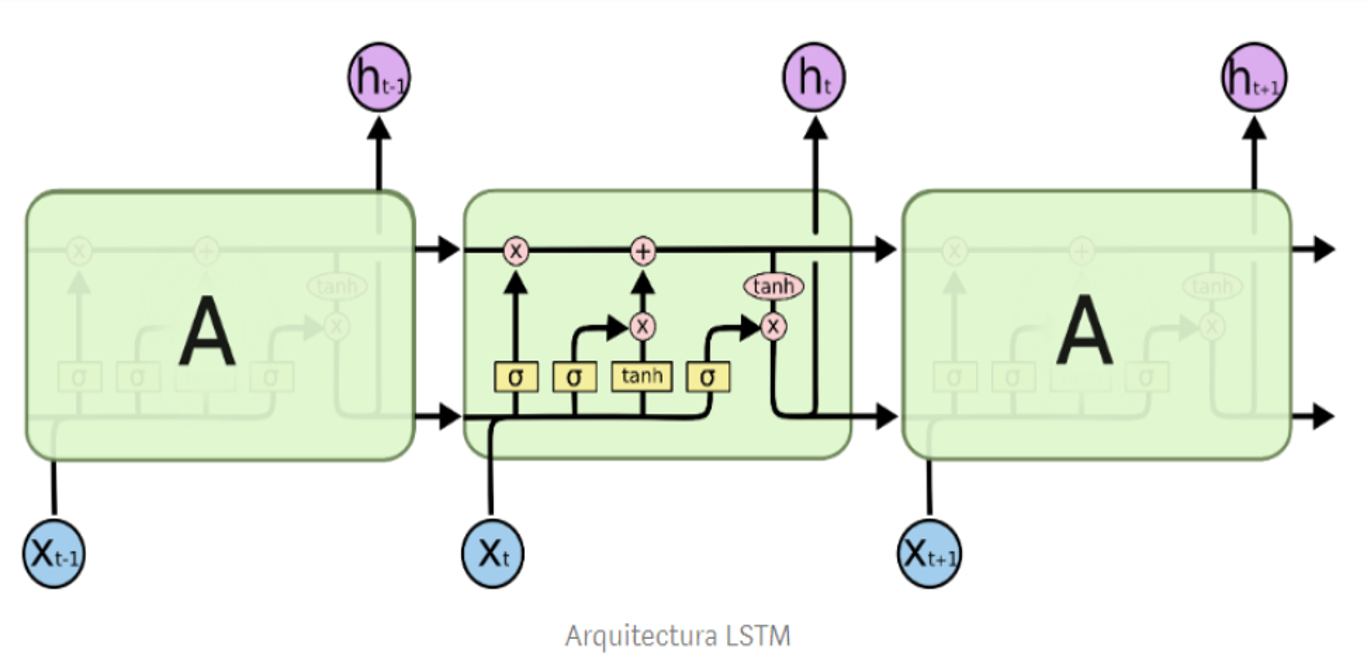

# Conjunto de datos
El conjunto de datos históricos sobre el precio del bitcoin, se obtuvo de la pagina web https://min-api.cryptocompare.com . Que contiene sobre los precios del bitcoin de los ultimos 1000 dias correspondientes al periodo 2018-06-30 hasta la presente fecha. con formato de valores separados por comas (.csv), también tiene un tipo diferente de precio en particular. Mediante la obtención de un conjunto de datos, se obtienen las características y el comportamiento finalizados de los precio. 

## Descripción de cada atributo

Describe el atributo del conjunto de datos que se proporciona a continuación. Los valores de los atributos están en punto flotante. 

* **time** :  - Fecha de negociación.

* **open** :  este precio del precio de apertura del precio del bitcoin, que significa el precio inicial de un día de negociación en particular, pero que no es el mismo precio del precio final del día de la cotización.

* **high** :  este es el precio más alto del precio del bitcoin  la acción en un día de negociación en particular.

* **low** :  este es el precio del bitcoin más bajo durante el día de negociación.

* **close** :  este es el precio de cierre del bitcoin durante el día de negociación en particular.

* **volumenfrom** :  este es el número de acciones negociadas en un día en particular.

# Preprocesamiento de datos

La primera etapa necesitamos importar todas las bibliotecas necesarias. El conjunto de datos recopilados se leyó utilizando la biblioteca panda en Python y muestra los registros para comprender el conjunto de datos para el preprocesamiento. En este punto, podemos identificar los comportamientos y las características del conjunto de datos.

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')
# biblioteca matemática para la función matemática
import math
# vista de datos etiquetados en dataframe
import pandas as pd
# el lector de datos od panda se utiliza para obtener los datos de la web
import pandas_datareader as web
# numpy se utiliza para crear matrices multidimensionales
import numpy as np
# tensorflow se utiliza para crear el modelo DL y envolver las otras bibliotecas
import tensorflow as tf
# sklearn proporciona funciones de ultilidad para estandarizar o escalar datos
from sklearn.preprocessing import MinMaxScaler
# sklearn proporciona funciones de ultilidad para calcular el error absoluto 
from sklearn.metrics import mean_absolute_error
# keras es una biblioteca de redes neuronales
from keras.layers import Dense,Activation,Flatten, Dropout, LSTM
from keras.models import Sequential
from keras.regularizers import l1
# se incluye para crear un área de gràficos
import matplotlib.pyplot as mtlplt
import matplotlib.pylab as plt
from matplotlib import pyplot
# distribución de la escala de características
from matplotlib import rcParams
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
from pandas import read_csv
import seaborn as sns
import json
import requests
from pandas import concat
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=1000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [ ]:
dataset=hist.drop(['volumeto','conversionType', 'volumefrom','conversionSymbol'],axis=1)

In [ ]:
dataset.tail(10)

,high,low,open,close
time,,,,
2021-04-21,56801.94,53640.81,56496.06,53803.25
2021-04-22,55458.61,50519.78,53803.25,51717.61
2021-04-23,52112.75,47495.24,51717.61,51178.03
2021-04-24,51223.86,48769.48,51178.03,50115.99
2021-04-25,50576.40,47073.07,50115.99,49120.97
2021-04-26,54389.71,48843.41,49120.97,54062.29
2021-04-27,55490.94,53357.59,54062.29,55073.48
2021-04-28,56461.55,53886.63,55073.48,54877.94
2021-04-29,55217.24,52399.42,54877.94,53581.58


In [ ]:
df = read_csv('crypto.csv', sep =';')

<function matplotlib.pyplot.show>

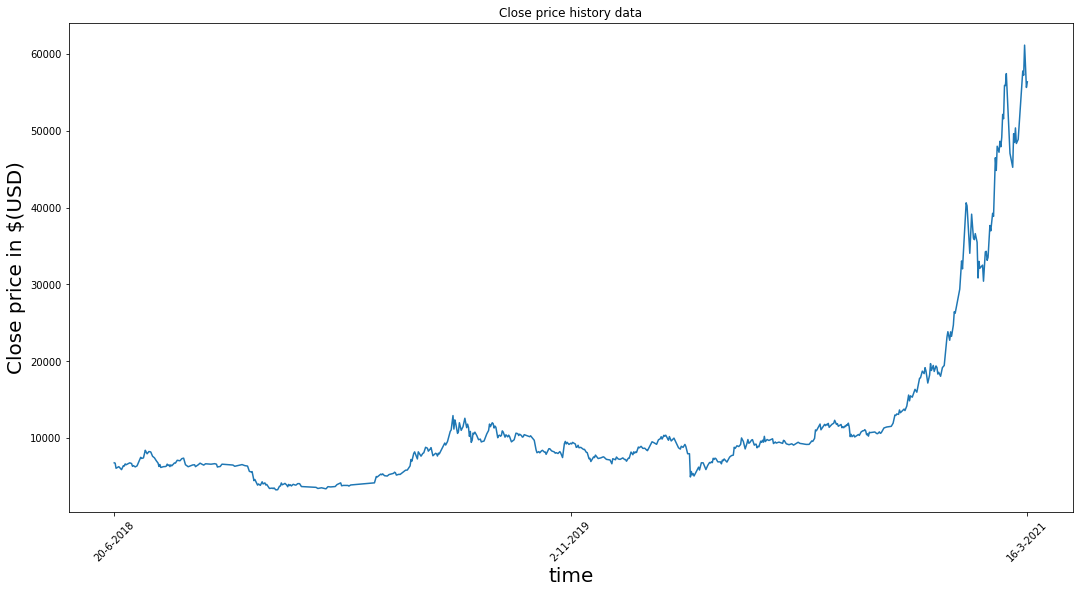

In [ ]:
## Visulaizing close price on graph from historical data
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(df['close'])
#plt.plot(range(data_frame.shape[0]),(data_frame['Low']+data_frame['High'])/2.0)
mtlplt.xticks(range(0,df.shape[0],500),df['time'].loc[::500],rotation=45)
mtlplt.xlabel('time', fontsize=20)
mtlplt.ylabel('Close price in $(USD)',fontsize=20)
mtlplt.show

# Visualización de la distribución de funciones.

La siguiente figura ilustra una visualización de la distribución de características. A través de este gráfico, se obtiene una mejor comprensión de las características y el coeficiente de la puntuación de determinación. Un mapa de calor se crea mediante características de índice excesivo. Aquí, podemos ver la correlación entre las características dadas del conjunto de datos, como  high ,  low ,  open, volumefrom , close. Cuando vemos el   punto de volumefrom en el mapa de calor, que es otra característica pero que no muestra ninguna correlación entre otras características. Por lo tanto, se decidio excluirse en la predicción.

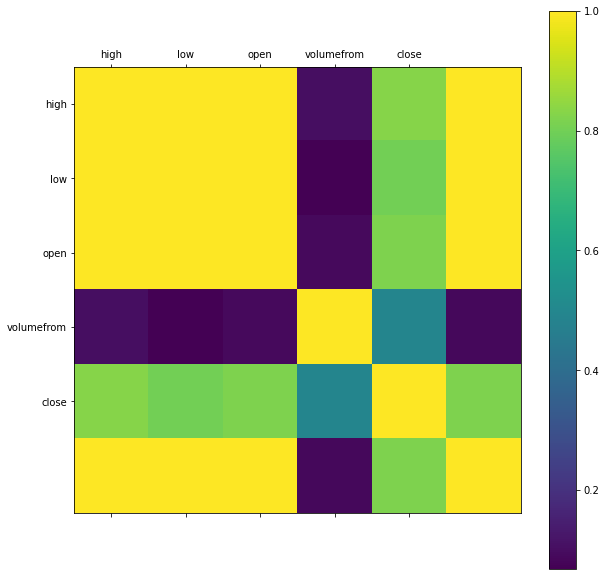

In [ ]:
scaling_data_frame = df.filter(['high', 'low', 'open', 'volumefrom', 'close'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_data_frame)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[df.time], columns=['high', 'low', 'open', 'volumefrom', 'close'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
mtlplt.matshow(df.corr())
mtlplt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
mtlplt.colorbar()

# Dividimos en set de Entrenamiento y Validación

El primer paso es preparar el conjunto de datos. Esto implica enmarcar el conjunto de datos como un problema de aprendizaje supervisado y normalizar las variables de entrada.

Enmarcaremos el problema de aprendizaje supervisado como una predicción del precio del Bitcoin diario en el paso de tiempo anterior. Para hacer la transformaciòn usaremos la funciòn series_to_supervised (), crea automáticamente nuevos marcos de problemas de series de tiempo dada la longitud deseada de las secuencias de entrada y salida. La función toma cuatro argumentos

* **data** : Secuencia de observaciones como una lista o matriz 2D NumPy. Requerido.
* **n_in** : Número de observaciones de retardo como entrada ( X ). Los valores pueden estar entre [1..len (datos)] Opcional. Por defecto es 1.
* **n_out** : Número de observaciones como salida ( y ). Los valores pueden estar entre [0..len (datos) -1]. Opcional. Por defecto es 1.
* **dropnan** : booleano para eliminar filas con valores NaN. Opcional. El valor predeterminado es Verdadero.
La función devuelve un solo valor:

* **return** : Pandas DataFrame de series enmarcadas para aprendizaje supervisado.
El nuevo conjunto de datos se construye como un DataFrame, con cada columna adecuadamente nombrada tanto por número de variable como por paso de tiempo. Esto le permite diseñar una variedad de diferentes tipos de problemas de pronóstico de secuencia de pasos de tiempo a partir de una determinada serie de tiempo univariante o multivariante.

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dataset = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dataset.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dataset.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

## Normalización
El escalado de características y la normalización de datos son la mejor manera de reducir la tasa de error y mejorar la precisión del modelo. Hay varios tipos de datos en un conjunto de datos determinado. Aquí, estoy poniendo todas las características seleccionadas en la misma escala. Por lo tanto, ninguna de las características domina a las demás. Debajo del código, se usa una instantánea para escalar los datos.

In [ ]:
PASOS=7

# load dataset
values = dataset['close'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)

#dataset['scaled'] = scaled
#scaledMerge=dataset.drop('close',axis=1)
#print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.reset_index(inplace=True, drop=True)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,-0.854842,-0.857115,-0.861251,-0.874502,-0.873690,-0.876893,-0.884272,-0.898799
1,-0.857115,-0.861251,-0.874502,-0.873690,-0.876893,-0.884272,-0.898799,-0.890239
2,-0.861251,-0.874502,-0.873690,-0.876893,-0.884272,-0.898799,-0.890239,-0.903163
3,-0.874502,-0.873690,-0.876893,-0.884272,-0.898799,-0.890239,-0.903163,-0.900208
4,-0.873690,-0.876893,-0.884272,-0.898799,-0.890239,-0.903163,-0.900208,-0.897543


Usaremos como entradas las columnas encabezadas como var1(t-7) a  var1(t-1) y nuestra salida (lo que sería el valor “Y” de la función) será el var5(t) -la última columna-.

A continuación, se dividio  los datos en dos conjuntos: conjunto de entrenamiento y conjunto de prueba con 80% y 20% de datos respectivamente.

In [ ]:
# split into train and test sets
values = reframed.values
n_train_days = 1001 - (60+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(934, 1, 7) (934,) (60, 1, 7) (60,)


In [ ]:
x_val.shape

(60, 1, 7)

# Implementación de algoritmo

### LSTM apilado
Se pueden apilar múltiples capas LSTM ocultas una encima de otra en lo que se conoce como modelo LSTM apilado.

Una capa LSTM requiere una entrada tridimensional y los LSTM de forma predeterminada producirán una salida bidimensional como una interpretación desde el final de la secuencia.

Podemos abordar esto haciendo que el LSTM genere un valor para cada paso de tiempo en los datos de entrada estableciendo el argumento return_sequences = True en la capa. Esto nos permite tener una salida 3D de la capa LSTM oculta como entrada a la siguiente.

Una vez finalizada la etapa de preprocesamiento, pasemos a la implementación del algoritmo LSTM. Antes de continuar con eso, cree un conjunto de datos de entrenamiento que contenga el precio del Bitcoin al cierre de los últimos siete días y luego prediga el precio de cierre  en los siguientes siete dias. Divida el conjunto de datos de entrenamiento en dos partes,  x_train  e  y_train . Aquí, el   conjunto de datos x_train es un conjunto de datos independiente y   el conjunto de datos y_train es un conjunto de datos dependiente.

El modelo LSTM tiene un conjunto de datos tridimensionales [número de muestras, pasos de tiempo, características].

Creamos el modelo LSTM que tiene dos capas LSTM que contienen cincuenta neuronas y también tiene 2 capas densas, una capa contiene veinticinco neuronas y la otra tiene una neurona. Para crear un modelo, la entrada secuencial del modelo LSTM que crea mediante el uso de la biblioteca Keras en DNN (Deep Neural Network). 

El modelo de compilación LSTM utiliza MSE (error cuadrático medio) para la función de pérdida y el optimizador es el "adam".

Para entrenar un modelo LSTM utilizando el conjunto de datos de entrenamiento creado. Aquí, ajuste el modelo entrenado con un tamaño de lote que es una cantidad de ejemplos de entrenamiento que presentan un solo lote, las épocas son otro parámetro que significa el número de iteraciones en el modelo de train, si el valor de la época aumenta, obtendrá el mucha precisión de la salida de su modelo.

In [ ]:
activity_regularizer=l1(0.001)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

Epoch 1/100
30/30 - 4s - loss: 0.3227 - val_loss: 0.5133
Epoch 2/100
30/30 - 0s - loss: 0.0192 - val_loss: 0.4592
Epoch 3/100
30/30 - 0s - loss: 0.0137 - val_loss: 0.3259
Epoch 4/100
30/30 - 0s - loss: 0.0108 - val_loss: 0.2022
Epoch 5/100
30/30 - 0s - loss: 0.0075 - val_loss: 0.1057
Epoch 6/100
30/30 - 0s - loss: 0.0050 - val_loss: 0.0456
Epoch 7/100
30/30 - 0s - loss: 0.0033 - val_loss: 0.0201
Epoch 8/100
30/30 - 0s - loss: 0.0023 - val_loss: 0.0137
Epoch 9/100
30/30 - 0s - loss: 0.0018 - val_loss: 0.0129
Epoch 10/100
30/30 - 0s - loss: 0.0016 - val_loss: 0.0134
Epoch 11/100
30/30 - 0s - loss: 0.0014 - val_loss: 0.0140
Epoch 12/100
30/30 - 0s - loss: 0.0013 - val_loss: 0.0147
Epoch 13/100
30/30 - 0s - loss: 0.0012 - val_loss: 0.0153
Epoch 14/100
30/30 - 0s - loss: 0.0012 - val_loss: 0.0159
Epoch 15/100
30/30 - 0s - loss: 0.0011 - val_loss: 0.0164
Epoch 16/100
30/30 - 0s - loss: 0.0011 - val_loss: 0.0168
Epoch 17/100
30/30 - 0s - loss: 0.0011 - val_loss: 0.0172
Epoch 18/100
30/30 - 0s

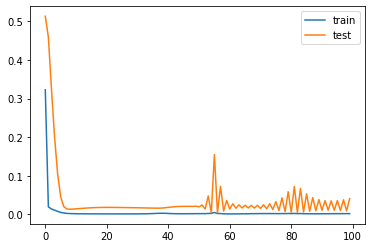

In [ ]:
# design network
model = Sequential()
## First LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(50, return_sequences= False))
## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

60


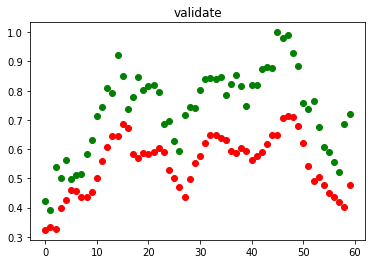

In [ ]:
results=model.predict(x_val)
print( len(results) )
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [ ]:
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara2 = pd.DataFrame(inverted)
compara2.columns = ['real', 'prediccion']
compara2['diferencia'] = compara2['real'] - compara2['prediccion']
compara2.head(10)

,real,prediccion,diferencia
0,46191.390625,43158.015625,3033.375000
1,45261.031250,43418.414062,1842.617188
2,49635.070312,43258.328125,6376.742188
3,48501.210938,45431.878906,3069.332031
4,50392.550781,46286.000000,4106.550781
5,48363.738281,47307.980469,1055.757812
6,48775.371094,47175.375000,1599.996094
7,48892.800781,46524.339844,2368.460938
8,50964.179688,46538.460938,4425.718750
9,52405.019531,47102.867188,5302.152344


In [ ]:
compara2.describe()

,real,prediccion,diferencia
count,60.000000,60.000000,60.000000
mean,55646.890625,49932.605469,5714.289551
std,4286.215820,2992.931152,2074.974365
min,45261.031250,43158.015625,1055.757812
25%,52379.519531,47516.369141,4180.229492
50%,56371.439453,50812.773438,5913.050781
75%,58743.500000,52104.394531,7156.935547
max,63558.484375,54952.398438,10623.152344


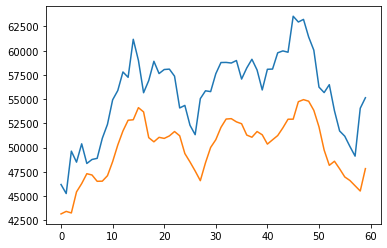

In [ ]:
compara2['real'].plot()
compara2['prediccion'].plot()

In [ ]:
#from numpy import concatenate
#from math import sqrt
#from sklearn.metrics import mean_squared_error

In [ ]:
# make a prediction
yhat = model.predict(x_val)
x_val = x_val.reshape((x_val.shape[0], x_val.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_val[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_val = y_val.reshape((len(y_val), 1))
inv_y = concatenate((y_val, x_val[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6073.456


#Pronòstico

In [ ]:
ultimosDias = dataset['2021-04-13':'2021-04-27']
ultimosDias

,high,low,open,close
time,,,,
2021-04-13,63682.32,59811.31,59845.76,63558.48
2021-04-14,64859.81,61312.98,63558.48,62964.27
2021-04-15,63826.89,62038.33,62964.27,63233.03
2021-04-16,63567.11,60048.13,63233.03,61416.41
2021-04-17,62541.21,59712.92,61416.41,60056.07
2021-04-18,60393.33,52785.10,60056.07,56246.82
2021-04-19,57590.64,54291.08,56246.82,55680.11
2021-04-20,57101.05,53429.73,55680.11,56496.06
2021-04-21,56801.94,53640.81,56496.06,53803.25


In [ ]:
# load dataset
values1 = ultimosDias['close'].values

# ensure all data is float
values1 = values1.astype('float32')
# normalize features
#scaler = MinMaxScaler(feature_range=(-1, 1))

values1=values1.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension

scaled1 = scaler.fit_transform(values1)

reframed = series_to_supervised(scaled1, PASOS, 1)
newReframed=reframed.drop(['var1(t)'],axis=1)
newReframed.head()


,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,1.000000,0.917686,0.954916,0.703263,0.514818,-0.012870,-0.091375
8,0.917686,0.954916,0.703263,0.514818,-0.012870,-0.091375,0.021657
9,0.954916,0.703263,0.514818,-0.012870,-0.091375,0.021657,-0.351373
10,0.703263,0.514818,-0.012870,-0.091375,0.021657,-0.351373,-0.640292
11,0.514818,-0.012870,-0.091375,0.021657,-0.351373,-0.640292,-0.715039


In [ ]:
values = newReframed.values
x_test = values[7:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)
print(x_test)
ultDiaSemana = newReframed.index[len(newReframed.index)-1]

(1, 1, 7)
[[[ 0.02165699 -0.35137272 -0.64029217 -0.7150388  -0.86216164
   -1.         -0.31548834]]]


In [ ]:
# LSTM 2

def agregarNuevoValor(x_test,nuevoValor,ultDiaSemana):
    for i in range(x_test.shape[2]-3):
        x_test[0][0][i] = x_test[0][0][i+3]
    ultDiaSemana=ultDiaSemana+1
    if ultDiaSemana>6:
        ultDiaSemana=0
    x_test[0][0][x_test.shape[2]-3]=ultDiaSemana
    x_test[0][0][x_test.shape[2]-2]=12
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test,ultDiaSemana

In [ ]:
# POR AHORA NO VA ######### LSTMA !
def agregarNuevoValor(x_test,nuevoValor,ultDiaSemana):
    for i in range(x_test.shape[2]-3):
        x_test[0][0][i+2] = x_test[0][0][i+3]
    ultDiaSemana=ultDiaSemana+1
    if ultDiaSemana>6:
        ultDiaSemana=0
    x_test[0][0][0]=ultDiaSemana
    x_test[0][0][1]=12
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test,ultDiaSemana

In [ ]:
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print('pred',i,x_test)
    x_test,ultDiaSemana=agregarNuevoValor(x_test,parcial[0],ultDiaSemana)

pred 0 [[[ 0.02165699 -0.35137272 -0.64029217 -0.7150388  -0.86216164
   -1.         -0.31548834]]]
pred 1 [[[ 0.         12.         -0.7150388  -0.86216164 -1.
   -0.31548834 -0.6143417 ]]]
pred 2 [[[ 1.         12.         -0.86216164 -1.         -0.31548834
   -0.6143417  -0.30759686]]]
pred 3 [[[ 2.         12.         -1.         -0.31548834 -0.6143417
   -0.30759686 -0.32578653]]]
pred 4 [[[ 3.         12.         -0.31548834 -0.6143417  -0.30759686
   -0.32578653 -0.3740382 ]]]
pred 5 [[[ 4.         12.         -0.6143417  -0.30759686 -0.32578653
   -0.3740382  -0.47762427]]]
pred 6 [[[ 5.         12.         -0.30759686 -0.32578653 -0.3740382
   -0.47762427 -0.5157734 ]]]


In [ ]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([-0.6143417], dtype=float32), array([-0.30759686], dtype=float32), array([-0.32578653], dtype=float32), array([-0.3740382], dtype=float32), array([-0.47762427], dtype=float32), array([-0.5157734], dtype=float32), array([-0.5611782], dtype=float32)]


array([[51904.94052622],
       [54119.25655741],
       [53987.9497738 ],
       [53639.63281294],
       [52891.87017107],
       [52616.4807703 ],
       [52288.71464718]])

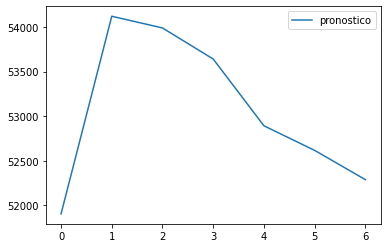

In [ ]:
prediccion1Semana = pd.DataFrame(inverted)
prediccion1Semana.columns = ['pronostico']
prediccion1Semana.plot()
prediccion1Semana.to_csv('pronostico_multivariate.csv')

In [ ]:
prediccion1Semana

,pronostico
0,51904.940526
1,54119.256557
2,53987.949774
3,53639.632813
4,52891.870171
5,52616.480770
6,52288.714647


# Conclusión
Debemos seguir las siguientes estrategias para aumentar la precisión del modelo en el algoritmo de memoria a largo y corto plazo (LSTM).

* Según  los resultados obtenidos el modelo se ajusta relativamente bien, ya que el conjunto de datos de entrenamiento practicamente se superponen al conujto de datos de validacion con un cierto margen de error.

* El valor promedio de margen de error en el precio del Bitcoin es de   2.900 $, segùn el modelo implementado. 

* Asignar más datos de series de tiempo para entrenamiento y pruebas (80% y 20%). Es una estrategia muy importante para obtener resultados de mayor precisión.

* Aplicar métodos de regularización  permite mejorar el sobreajsute del modelo y así realizar una mayor generalización. 

